In [1]:
import numpy as np
import time
from annchor.datasets import load_digits,load_digits_large
import matplotlib.pyplot as plt

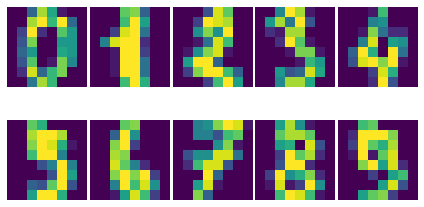

In [2]:
k=25

X = load_digits()['X']
y = load_digits()['y']
neighbor_graph = load_digits()['neighbor_graph']

nx = X.shape[0]

fig,axs = plt.subplots(2,5)
axs = axs.flatten()
for i,ax in enumerate(axs):
    ax.imshow(X[y==i][0].reshape(8,8))
    ax.axis('off')

plt.tight_layout(h_pad=0.1, w_pad=0.3)
plt.show()

In [3]:
from annchor.distances import wasserstein
from annchor import compare_neighbor_graphs



In [18]:
from annchor import Annchor

start_time = time.time()

# Call ANNchor
ann = Annchor(X,
              wasserstein,
              n_anchors=25,
              n_neighbors=k,
              n_samples=5000,
              p_work=0.14)
self = ann
start = time.time()
if self.verbose: print('computing anchors...')
self.get_anchors()
if self.verbose: print('get_anchors:', time.time()-start)

if self.verbose: print('computing locality...')
self.get_locality()
if self.verbose: print('get_locality:', time.time()-start)

if self.verbose: print('computing features...')
self.get_features()
if self.verbose: print('get_features:', time.time()-start)

if self.verbose: print('computing sample...')
self.get_sample()
if self.verbose: print('get_sample:', time.time()-start)

if self.verbose: print('fitting regression...')
self.fit_predict_regression()
if self.verbose: print('fit_predict_regression:', time.time()-start)

if self.verbose: print('fitting errors...')
self.fit_predict_errors()
if self.verbose: print('fit_predict_errors:', time.time()-start)

ts = []
mx=2
for i in range(mx):
    if self.verbose: print('selecting/refining candidate pairs (%d/%d)' % (i,mx))
    self.select_refine_candidate_pairs(w=1/mx)
    if self.verbose: print('select_refine_candidate_pairs:', time.time()-start)
    ts.append( self.thresh.copy())
    
if self.verbose: print('generating neighbour graph')
self.get_ann()
if self.verbose: print('get_ann:', time.time()-start)
            
            


print('ANNchor Time: %5.3f seconds' % (time.time()-start_time))

# Test accuracy
error = compare_neighbor_graphs(neighbor_graph,
                                ann.neighbor_graph,
                                k)
print('ANNchor Accuracy: %d incorrect NN pairs (%5.3f%%)' % (error,100*error/(k*nx)))

ANNchor Time: 22.876 seconds
ANNchor Accuracy: 58 incorrect NN pairs (0.129%)


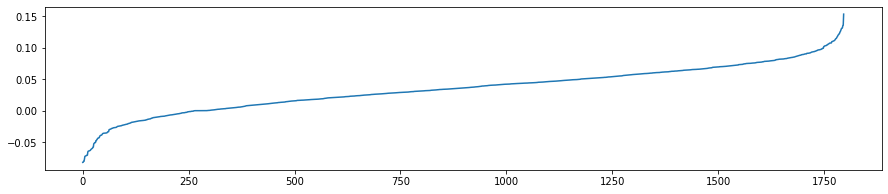

In [20]:
fig,ax = plt.subplots(figsize=(15,3))
for i in range(mx-1):
    ax.plot(np.sort(ts[i]-ts[i+1]))
